In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# Step 1: Load Dataset
iris = pd.read_csv('/content/Iris (1).csv')

In [ ]:
# Step 2: Display basic info and head
print("Dataset Info:")
print(iris.info())
print("\nFirst 5 rows:")
print(iris.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2

In [ ]:
# Step 3: Descriptive statistics
print("\nDescriptive statistics:")
print(iris.describe())


Descriptive statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
# Step 4: Unique species (target labels)
print("\nSpecies in dataset:", iris['Species'].unique())


Species in dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


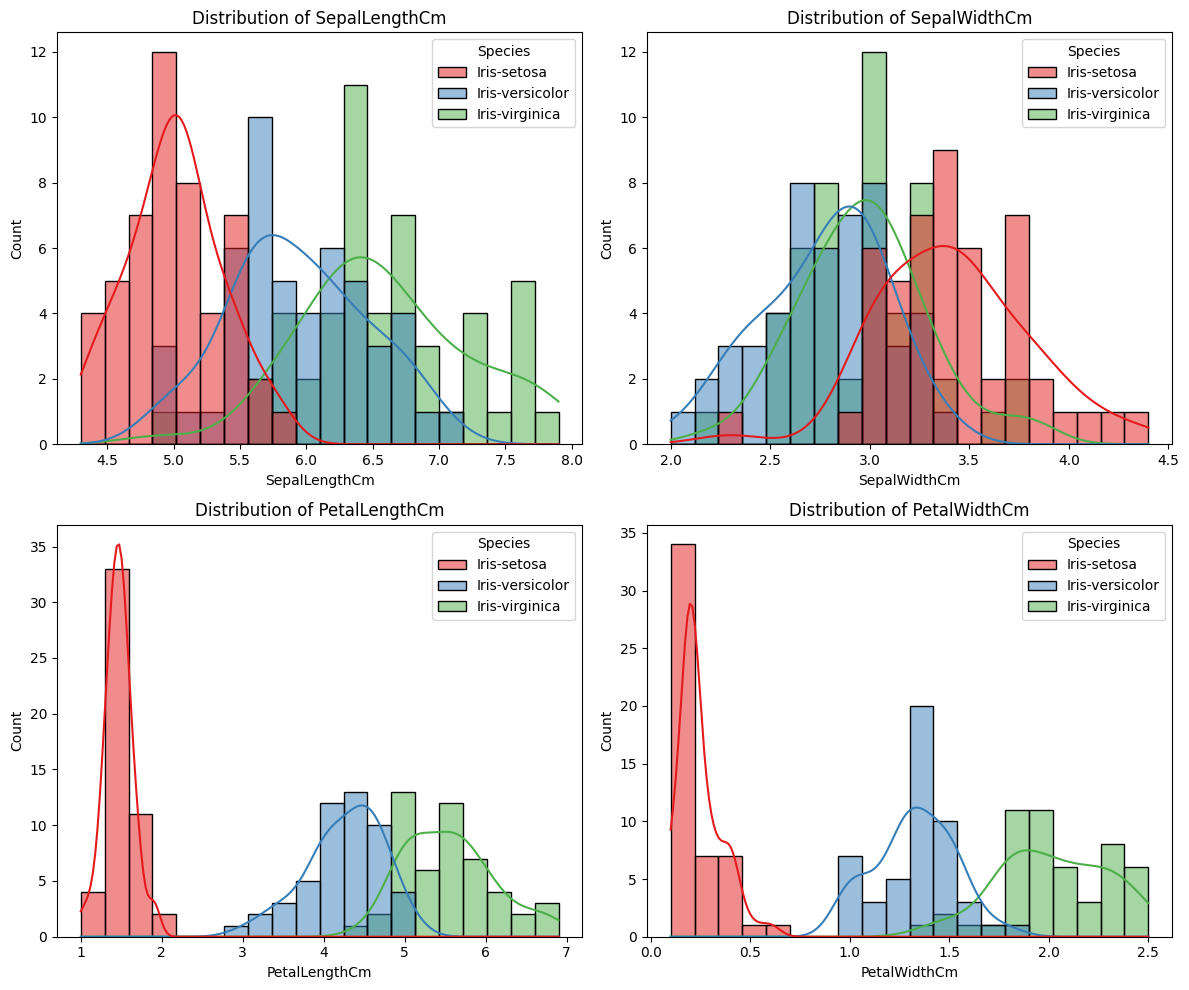

In [ ]:
# Step 5: Visualize distributions of features by species
plt.figure(figsize=(12,10))
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris, x=feature, hue='Species', kde=True, palette='Set1', bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

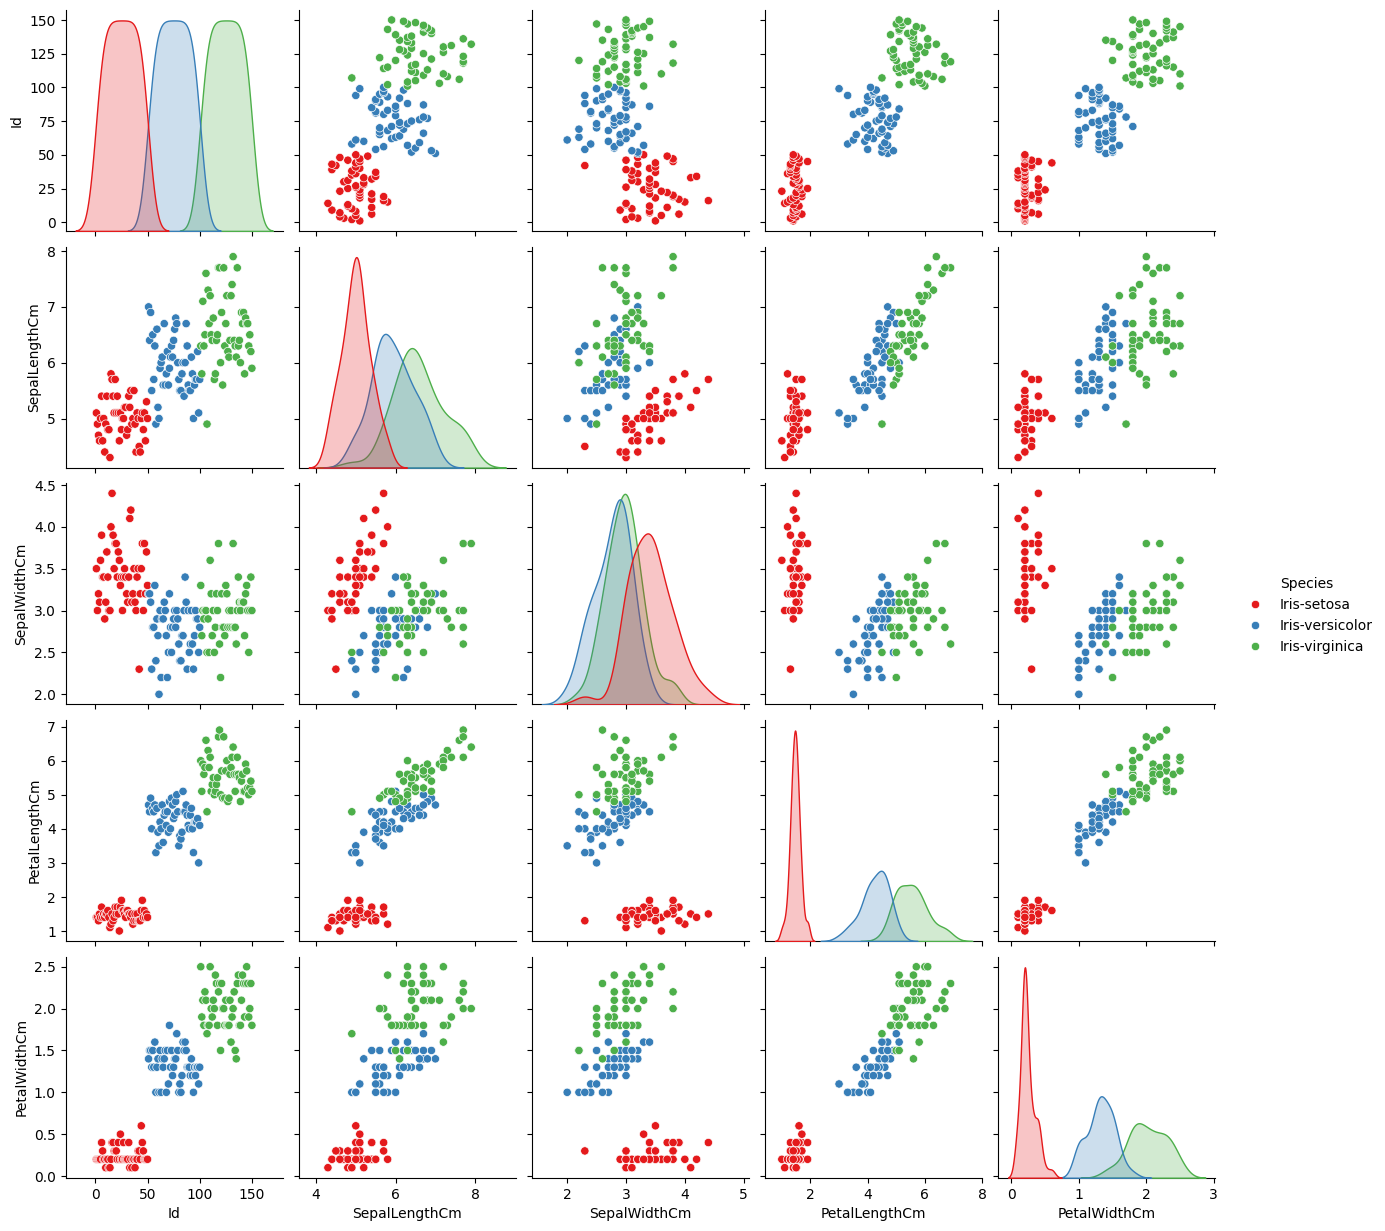

In [ ]:
# Step 6: Pairplot to see relationships
sns.pairplot(iris, hue='Species', palette='Set1')
plt.show()

In [ ]:
# Step 7: Encode target labels
le = LabelEncoder()
iris['label'] = le.fit_transform(iris['Species'])

In [ ]:
# Step 8: Prepare features and target
X = iris[features]
y = iris['label']

In [ ]:
# Step 9: Split dataset into training and test sets (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 10: Train SVM classifier
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Step 11: Predict on test set
y_pred = model.predict(X_test)


In [ ]:
# Step 12: Model evaluation
print("\nAccuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy on test data: 1.0

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



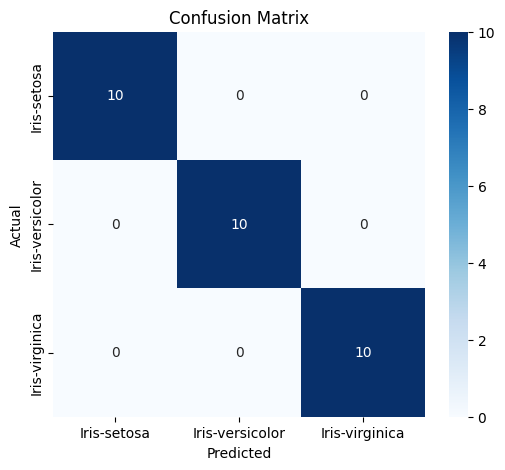

In [ ]:
# Step 13: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

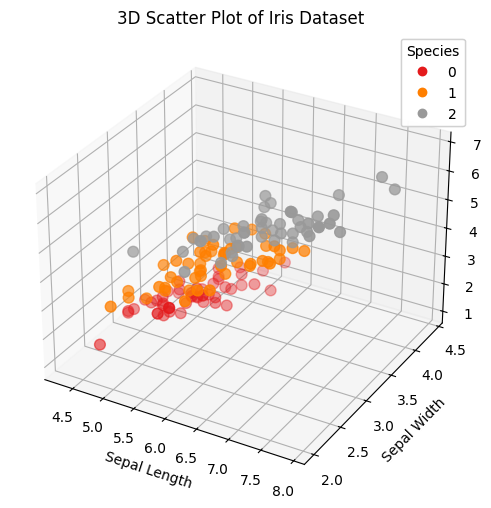

In [ ]:
# Step 14: 3D scatter plot of first 3 features colored by species
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    iris['SepalLengthCm'], iris['SepalWidthCm'], iris['PetalLengthCm'],
    c=iris['label'], cmap='Set1', s=60
)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)
plt.show()

In [ ]:
# Step 15: Predict species for new input
x_new = np.array([[5.1, 3.5, 1.4, 0.2]])
if model.n_features_in_ == x_new.shape[1]:
    pred_label = model.predict(x_new)[0]
    pred_species = le.inverse_transform([pred_label])[0]
    print(f"\nPrediction for input {x_new[0]}: {pred_species}")
else:
    print(f"Feature mismatch: Model expects {model.n_features_in_} features, but got {x_new.shape[1]}")


Prediction for input [5.1 3.5 1.4 0.2]: Iris-setosa
